# Heart Attack Prediction

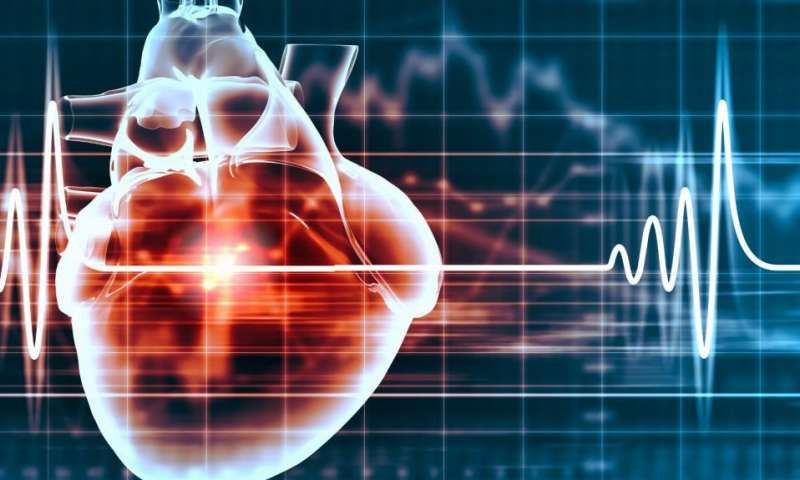

# Introduction 
"Heart disease is broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred as cardiovascular diseases. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack."



### Objective(s):

Explore the heart disease dataset using exploratory data analysis (EDA)  
Exercise with classification algorithms for prediction (modelling)

### Dataset description

This dataset consists of 11 features and a target variable. It has 8 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. age: The person’s age in years 
2. sex: The person’s sex (1 = male, 0 = female)
3. cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina 
4. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person’s cholesterol measurement in mg/dl
6. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false))
7. restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
— Value 1: normal
— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach: The person’s maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
0: downsloping; 1: flat; 2: upsloping.
12.target: Heart disease (1 = no, 0= yes)

##### Importing Libraries

In [1]:
!pip install plotly

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from plotly.offline import  iplot

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from xgboost import XGBClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("C:/Users/HP/Downloads/heart_statlog_cleveland_hungary_final.csv")

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'target'],
      dtype='object')

In [7]:
data.shape

(1190, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  target    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


📌 We have 1190 rows and 12 columns in our dataset.

📌 We can see that the dataset contains numerical variables.

In [9]:
#Missing value analysis
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

<AxesSubplot:>

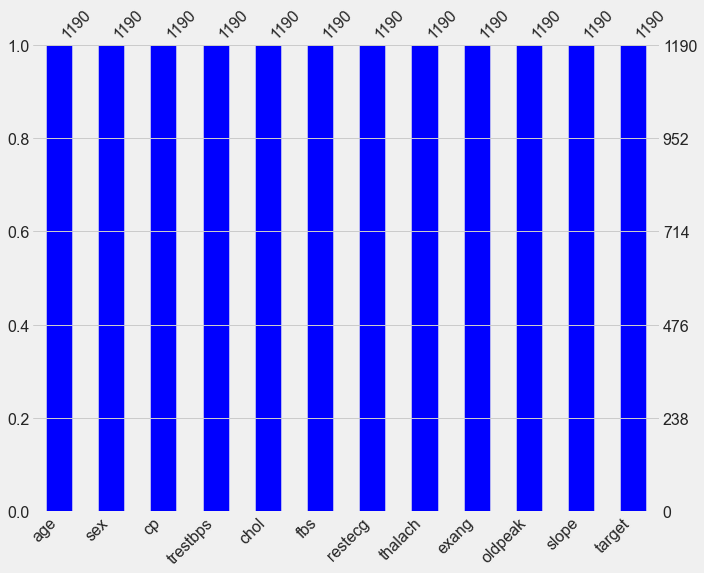

In [10]:
msno.bar(data, color = 'b', figsize = (10,8))

📌 There are no missing values present in our dataset.

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


📌 The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.



# Multivariate normality

Used test for checking multivariate normality is : Henze-Zirkler test

Ho:The variables follow a multivariate normal distribution


H1:The variables do not follow a multivariate normal distribution.

In [12]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [13]:
from pingouin import multivariate_normality

In [14]:
df=pd.DataFrame(data)
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      40    1   2       140   289    0        0      172      0      0.0   
1      49    0   3       160   180    0        0      156      0      1.0   
2      37    1   2       130   283    0        1       98      0      0.0   
3      48    0   4       138   214    0        0      108      1      1.5   
4      54    1   3       150   195    0        0      122      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1185   45    1   1       110   264    0        0      132      0      1.2   
1186   68    1   4       144   193    1        0      141      0      3.4   
1187   57    1   4       130   131    0        0      115      1      1.2   
1188   57    0   2       130   236    0        2      174      0      0.0   
1189   38    1   3       138   175    0        0      173      0      0.0   

      slope  target  
0         1       0  
1         2       1  
2        

In [15]:
multivariate_normality(data, alpha=.05)

HZResults(hz=3.2008380572189306, pval=0.0, normal=False)

​as p value is less than 0.05 so we are unable to accept H0 and hence variables do not follow a multivariate normal distribution.

In [16]:
# Renaming columns.
data.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. Heart Rate',
       'Exercise Induced Angina', 'Previous Peak', 'Slope', 'Condition']

In [17]:
numerical = ['Age','Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
categorical= ['Sex','Chest Pain Type','Fasting Blood Sugar','Resting ECG','Exercise Induced Angina','Slope']

# Chi-square test of independence

### for the relationship between two categorical variables

In [18]:
#The chi-square test is one of the most common ways to examine relationships between two or more categorical variables.

In [19]:
data[['Sex','Chest Pain Type']]

,Sex,Chest Pain Type
0,1,2
1,0,3
2,1,2
3,0,4
4,1,3
...,...,...
1185,1,1
1186,1,4
1187,1,4
1188,0,2


In [20]:
#Contingency Table
contingency_table=pd.crosstab(data["Sex"],data["Chest Pain Type"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Chest Pain Type   1    2    3    4
Sex                               
0                14   77   85  105
1                52  139  198  520


In [21]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 14  77  85 105]
 [ 52 139 198 520]]


In [22]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 15.58487395  51.00504202  66.82605042 147.58403361]
 [ 50.41512605 164.99495798 216.17394958 477.41596639]]


In [23]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [24]:
# significance level 5%
alpha=0.05

In [25]:
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 17.554951376250052


In [26]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 2.791230116094834e-05


In [27]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [28]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 17.554951376250052
critical_value: 3.841458820694124
p-value: 2.791230116094834e-05


In [29]:
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [30]:
##### Other Method ##########

In [31]:
from scipy.stats import chi2_contingency

In [42]:
table=data[['Resting ECG','Condition']]
crosstab = pd.crosstab(table["Resting ECG"], table["Condition"])
crosstab

Condition,0,1
Resting ECG,,
0,353,331
1,62,119
2,146,179


In [43]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 2


In [44]:
print(expected)

[[322.45714286 361.54285714]
 [ 85.32857143  95.67142857]
 [153.21428571 171.78571429]]


In [45]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))



probability=0.950, critical=5.991, stat=18.182


In [46]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


In [47]:
table=data[['Sex','Condition']]
crosstab = pd.crosstab(table["Sex"], table["Condition"])
crosstab

Condition,0,1
Sex,,
0,211,70
1,350,559


In [48]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)

Degress of freedom = 1


In [49]:
print(expected)

[[132.47142857 148.52857143]
 [428.52857143 480.47142857]]


In [50]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))



probability=0.950, critical=3.841, stat=113.832


In [51]:
if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


# Exploratory Data Analysis

### Pie Chart

findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


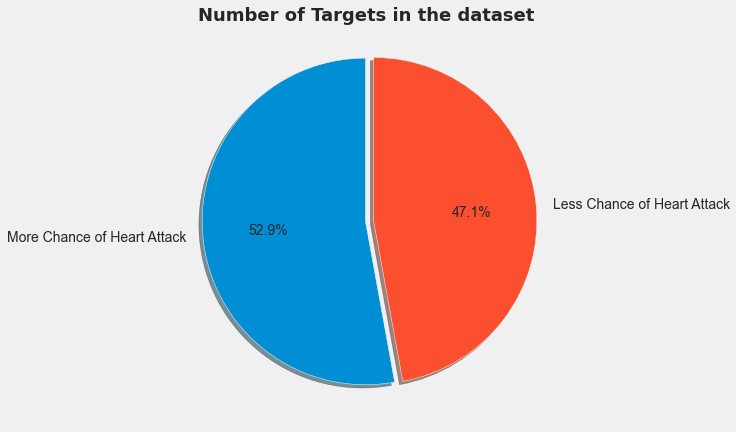

In [30]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = data['Condition'].value_counts(sort = True)

explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, family='Sherif', size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

📌 From the above pie chart, we can see that we have relatively more people who have more chances of having a Heart Attack.

# Heat Map Correlation

<AxesSubplot:>

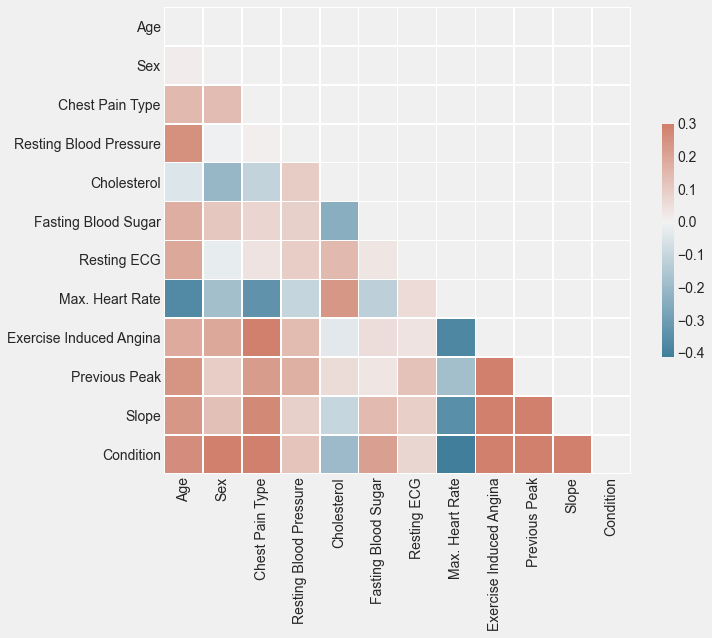

In [31]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

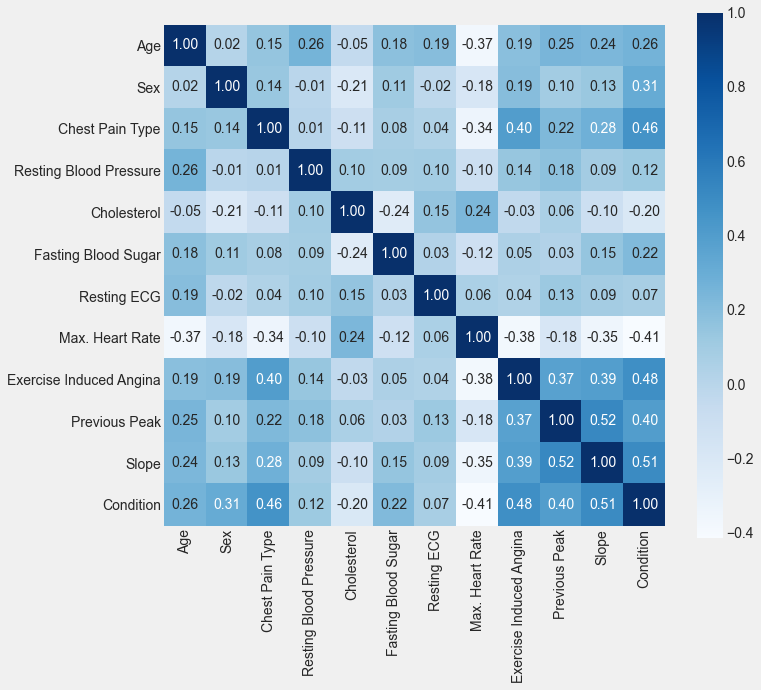

In [32]:
plt.figure(figsize=(10,9))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f',cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

📌 From the above correlation matrix, we can see that the correlation between features is less.  
 📌 oldpeak i.e.ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot) with the slope of the peak exercise ST segment and the slope of the peak exercise ST segment with Condition have high correlated features in our dataset; Correlation Coefficient of 0.52 and 0.51 respectively.     
   📌 Our features have a lot of negative correlation coefficient indicating that two individual variables have a statistical relationship such that generally move in opposite directions from one another.

### Count Plot 

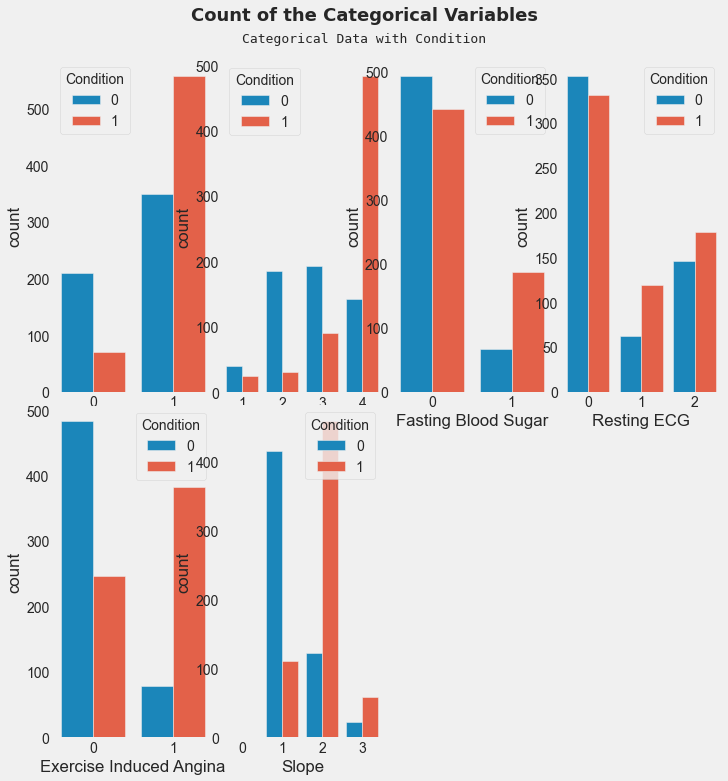

In [33]:

# Count Plot of Categorical Data with Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=data, x=i, hue='Condition', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plots, we can see that we have different features which have a common and uncommon type of categories in our dataset.   
📌 But, It is not enough to tell us about the features. Let's compare all the categorical features with the target column of Condition.

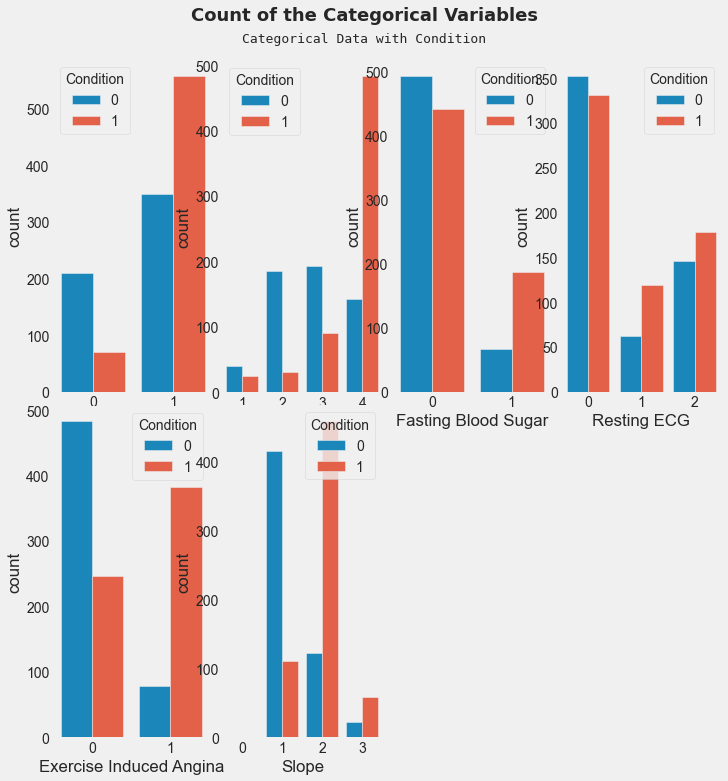

In [34]:
# Count Plot of Categorical Data with Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=data, x=i, hue='Condition', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1



From above categorical plots we can see that:    
📌 In Chest Pain, Type 0 has the highest number of people who have less chance of suffering from a heart attack.   
📌 Fasting Blood Sugar and Resting ECG doesn't have much difference in their respective conditions.    
📌 In Exercise-Induced Angina, Type 0 has the highest number of people who are likely to suffer a heart attack.    
📌 Slope has Type 2 which shows people who are likely to suffer from a heart attack.

### Distribution Plot 

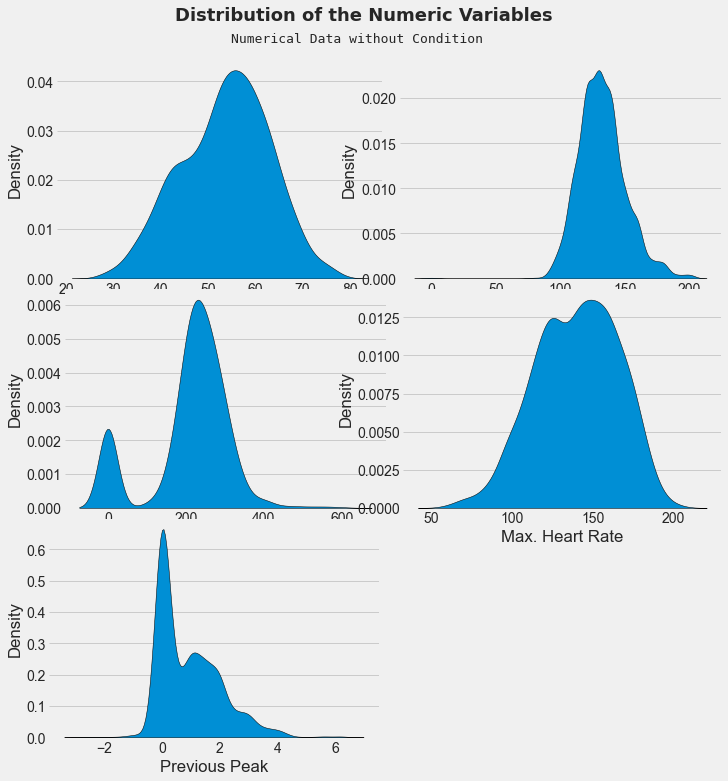

In [35]:
# Distribution Plot of Numerical Data w/o Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.315,1.02,"Numerical Data without Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=data, x=i, fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plots, we can see that the distribution density of different features them being skew. Let's also compare them with the target column of Condition to see how to perform.

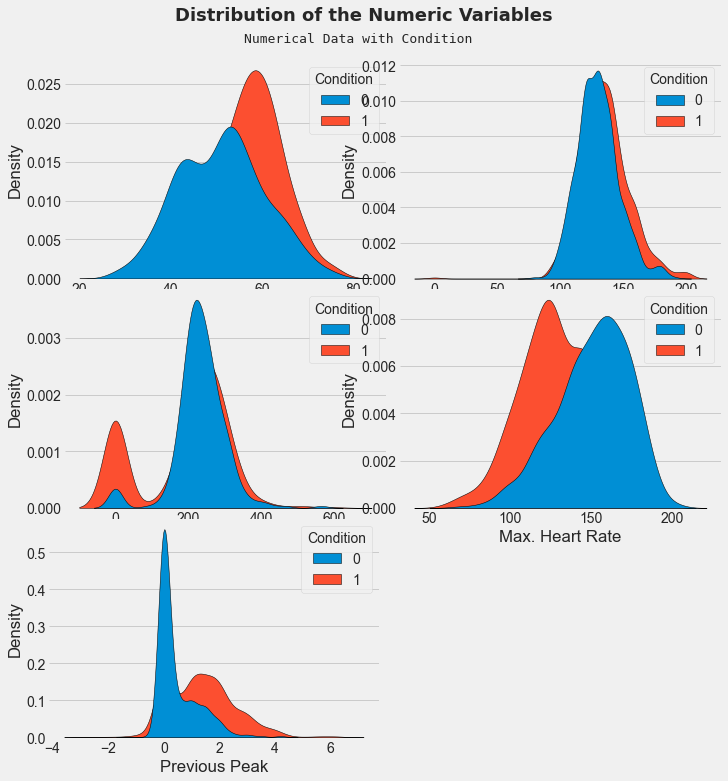

In [36]:
# Distribution Plot of Numerical Data with Condition
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=data, x=i, hue='Condition', fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above distribution plot, we can see that, Age and Max. Heart Rate is Negative Skewed and Resting Blood Pressure, Cholesterol, and Previous Peak are Positive Skewed.

## Scatter Plot 

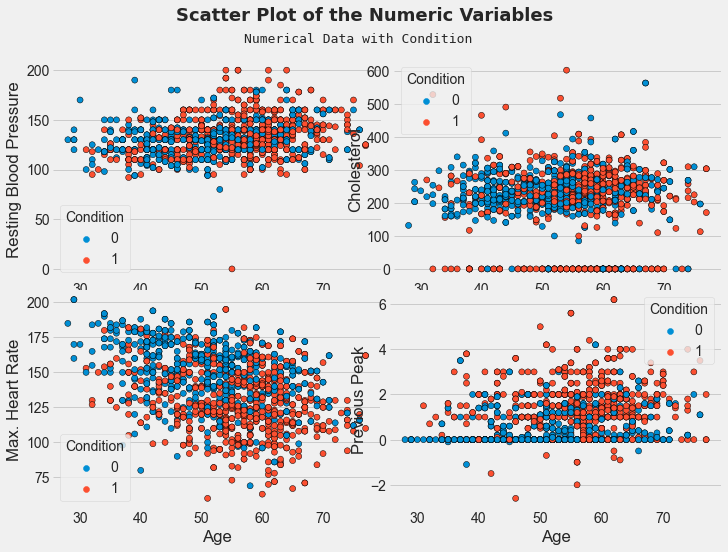

In [37]:
# Scatter Plot of Numerical Data with Condition
num_cols = ['Resting Blood Pressure','Cholesterol','Max. Heart Rate','Previous Peak']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Scatter Plot of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in data[num_cols]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.scatterplot(data=data,x=data['Age'],y=i,hue=data['Condition'],ec='black')
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

📌 From the above plot, we can see that the relationship between Age and different numerical features in our dataset with Condition. We can also few Outliers in our plot.

### Outliers

📌 An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

Detection 

📌 In this notebook, we are using Boxen Plot to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier. This is also known as “Univariate method” as here we are using one variable outlier analysis.

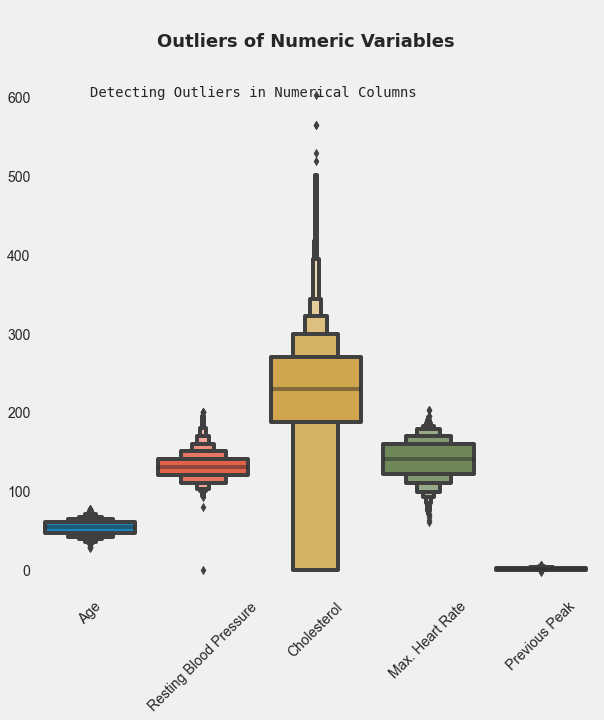

In [38]:
# Outliers Detection
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.4, 1.64, 'Detecting Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = data[numerical])
plt.grid( color='Black',linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

##### Removal

📌 After detecting, we are using Median Imputation to take care of outliers. In this technique, we replace the extreme values with median values.      
📌 It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.      
📌 It is advised to not use mean values as they are affected by outliers.

In [39]:
# Removing Outliers
for i in data[numerical]:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(data[i])
    for j in data[i]:
        if j > Upper_tail or j < Lower_tail:
            data[i] = data[i].replace(j, med)

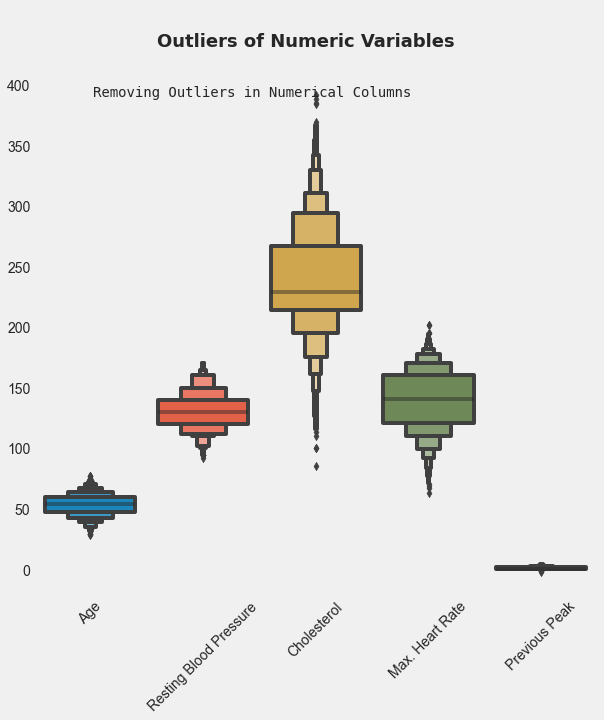

In [40]:
plt.figure(figsize=(9,9))
plt.suptitle("Outliers of Numeric Variables",y=0.94, family='Sherif', size=18, weight='bold')
plt.text(-0.405, 1.64, 'Removing Outliers in Numerical Columns', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,size=14,fontweight='light', fontfamily='monospace')
sns.boxenplot(data = data[numerical])
plt.grid( linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [41]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [42]:
x

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [43]:
X=data.drop(['Condition'],axis=1)
feature_names=list(X.columns)

In [44]:
# Splitting Data into Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [45]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (952, 11)
Number transactions y_train dataset:  (952,)
Number transactions x_test dataset:  (238, 11)
Number transactions y_test dataset:  (238,)


In [46]:
# Feature Scaling with StandardScaler
#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The goal of applying Feature Scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most ML algorithms.  

StandardScaler results in a distribution with a standard deviation equal to 1.   

StandardScaler does distort the relative distances between the feature values

# Models

📌 True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.    
📌 True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.    
📌 False Positives (FP) – When actual class is no and predicted class is yes.    
📌 False Negatives (FN) – When actual class is yes but predicted class in no.    
📌 Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy = TP+TN/TP+FP+FN+TN    
📌 Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision = TP/TP+FP    
📌 Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. Recall = TP/TP+FN     
📌 F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 Score = 2(Recall Precision) / (Recall + Precision)    
📌 Support - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process.

## Logistic Regression 

📌 Logistic Regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. You can construct a logistic regression model using the LogisticRegression class.

In [47]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)
y_pred_lr = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred_lr)

print(classification_report(y_test, y_pred_lr))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       109
           1       0.82      0.86      0.84       129

    accuracy                           0.82       238
   macro avg       0.82      0.82      0.82       238
weighted avg       0.82      0.82      0.82       238

Accuracy Score:  0.8235294117647058


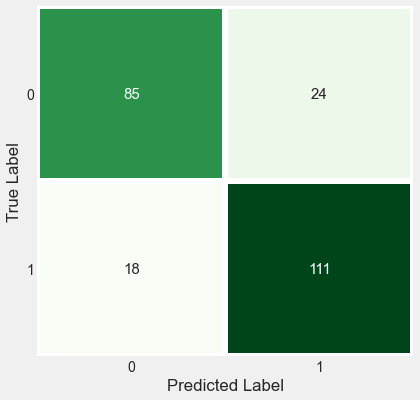

In [48]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

### K-Nearest Neighbors 

📌 The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems

In [49]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred_KNN = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred_KNN)

print(classification_report(y_test, y_pred_KNN))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.86      0.91      0.88       129

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Accuracy Score:  0.8697478991596639


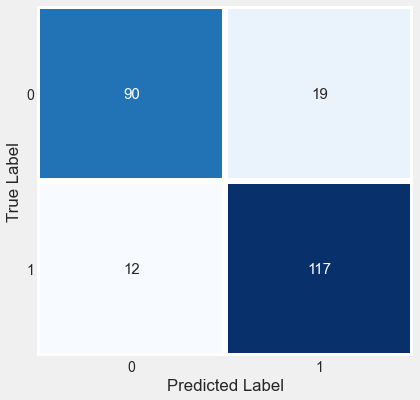

In [50]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

### Naive Bayes Classifier

📌 A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [51]:
#Fitting GaussianNB Model
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred_NB = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred_NB)

print(classification_report(y_test, y_pred_NB))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_NB))


              precision    recall  f1-score   support

           0       0.81      0.82      0.81       109
           1       0.84      0.84      0.84       129

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238

Accuracy Score:  0.8277310924369747


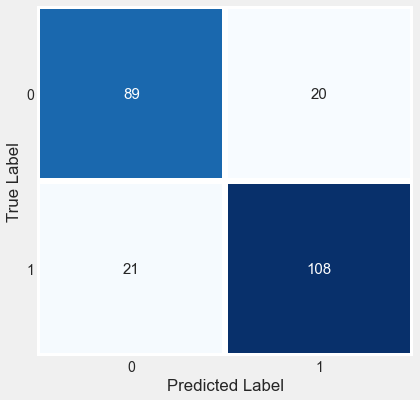

In [52]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

## Decision Tree (CART)

📌 Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index). You can construct a CART model using the DecisionTreeClassifier class

In [53]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'gini',random_state= 0)
classifier.fit(x_train, y_train)
y_pred_dtcart = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred_dtcart)

print(classification_report(y_test, y_pred_dtcart))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_dtcart))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       109
           1       0.92      0.91      0.91       129

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238

Accuracy Score:  0.907563025210084


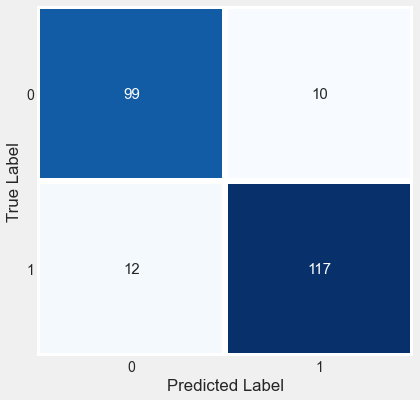

In [54]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

## Random Forest 

📌 Random Forests is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. You can construct a Random Forest model for classification using the RandomForestClassifier class.

In [55]:
#Fitting RandomForestClassifier Model
classifierRF = RandomForestClassifier()
classifierRF.fit(x_train, y_train)
y_pred_rfor = classifierRF.predict(x_test)
y_prob = classifierRF.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred_rfor)

print(classification_report(y_test, y_pred_rfor))
print('Accuracy Score: ',accuracy_score(y_test, y_pred_rfor))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       109
           1       0.93      0.96      0.94       129

    accuracy                           0.94       238
   macro avg       0.94      0.93      0.94       238
weighted avg       0.94      0.94      0.94       238

Accuracy Score:  0.9369747899159664


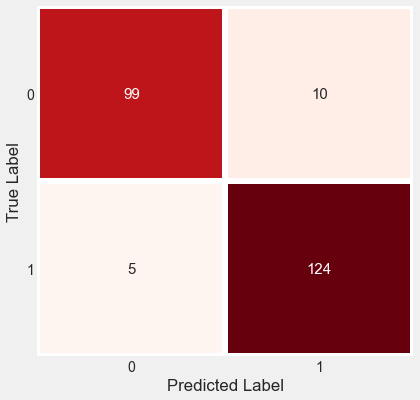

In [56]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()


# SVM 
📌 Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes Of particular importance is the use of different kernel functions via the kernel parameter .A powerful Radial Basis Function is used by default. You can construct an SVM model using the SVC class.

In [57]:
#Fitting SVC Model
classifier = SVC(probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.84      0.88      0.86       129

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Accuracy Score:  0.8445378151260504


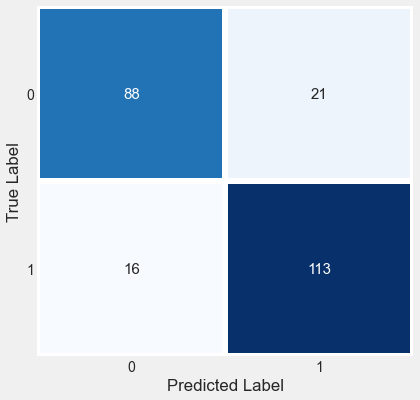

In [58]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

# XGBoost 
📌 XGBoost stands for Extreme Gradient Boosting, it is a performant machine learning library based on the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. XGBoost implements a Gradient Boosting algorithm based on decision trees.

In [59]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       109
           1       0.93      0.92      0.93       129

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238

Accuracy Score:  0.9201680672268907


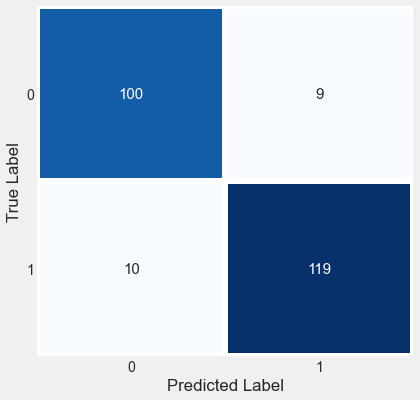

In [60]:
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation = 0)
plt.show()

In [61]:
dist={"Model":['Logistic Regression','K-Nearest Neighbors','Naive Bayes Classifier','Decision Tree (CART)','Random Forest','SVM','XGBoost'],
      "Accuracy Percentage":[82.35294117647058,86.97478991596639,82.77310924369747,90.7563025210084,93.69747899159664,84.45378151260504,92.01680672268907]}
Model_Accuracy=pd.DataFrame(dist)
Model_Accuracy

,Model,Accuracy Percentage
0,Logistic Regression,82.352941
1,K-Nearest Neighbors,86.974790
2,Naive Bayes Classifier,82.773109
3,Decision Tree (CART),90.756303
4,Random Forest,93.697479
5,SVM,84.453782
6,XGBoost,92.016807


In [62]:
prediction=classifierRF.predict([[37,0,3,130,211,0,0,140,0,0,1]])
print("x=%s, Predicted=%s" % ([[37,0,3,130,211,0,0,140,0,0,1]][0],prediction[0]))

x=[37, 0, 3, 130, 211, 0, 0, 140, 0, 0, 1], Predicted=1


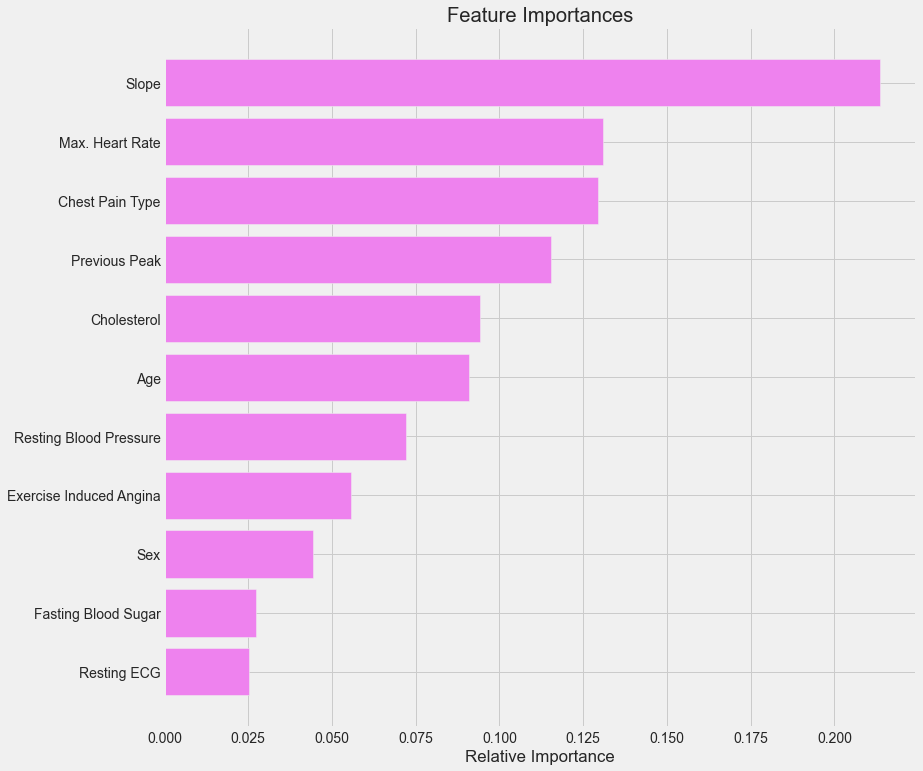

In [63]:
##Feature Importance
importances= classifierRF.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='violet',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From above we can observe that the slope of the peak exercise ST segment is the most important feature....   
And chest pain is the second most important feature in our data